In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [2]:
raw = pd.read_csv('Hotel_Reviews.csv')
raw.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
raw[(raw['Negative_Review']=='No Negative')|(raw['Positive_Review']=='No Positive')]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
13,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/4/2017,7.7,Hotel Arena,Italy,No Negative,0,1403,This hotel is being renovated with great care...,59,6,9.2,"[' Business trip ', ' Solo traveler ', ' Duple...",30 days,52.360576,4.915968
15,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/3/2017,7.7,Hotel Arena,Italy,No Negative,0,1403,This hotel is awesome I took it sincirely bec...,82,26,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",31 days,52.360576,4.915968
18,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,6/29/2017,7.7,Hotel Arena,Netherlands,No Negative,0,1403,Public areas are lovely and the room was nice...,33,4,7.1,"[' Business trip ', ' Group ', ' Duplex Double...",35 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515724,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,10/27/2015,8.1,Atlantis Hotel Vienna,India,No Negative,0,2823,Only location little far away from City,9,7,8.3,"[' Leisure trip ', ' Family with young childre...",646 day,48.203745,16.335677
515729,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,9/26/2015,8.1,Atlantis Hotel Vienna,Brazil,No Negative,0,2823,The breakfast was excelent lots of fress frui...,27,7,10.0,"[' Leisure trip ', ' Couple ', ' Standard Doub...",677 day,48.203745,16.335677
515732,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,9/6/2015,8.1,Atlantis Hotel Vienna,Kuwait,No Negative,0,2823,helpful staff allowed me to check in early as...,18,6,10.0,"[' Leisure trip ', ' Family with young childre...",697 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677


In [4]:
raw['Reviewer_Nationality'].nunique()

227

(array([  3833.,   6895.,  11553.,  17948.,  12531.,  34091.,  60144.,
         74769., 106167., 187807.]),
 array([ 2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,  8.5 ,
         9.25, 10.  ]),
 <BarContainer object of 10 artists>)

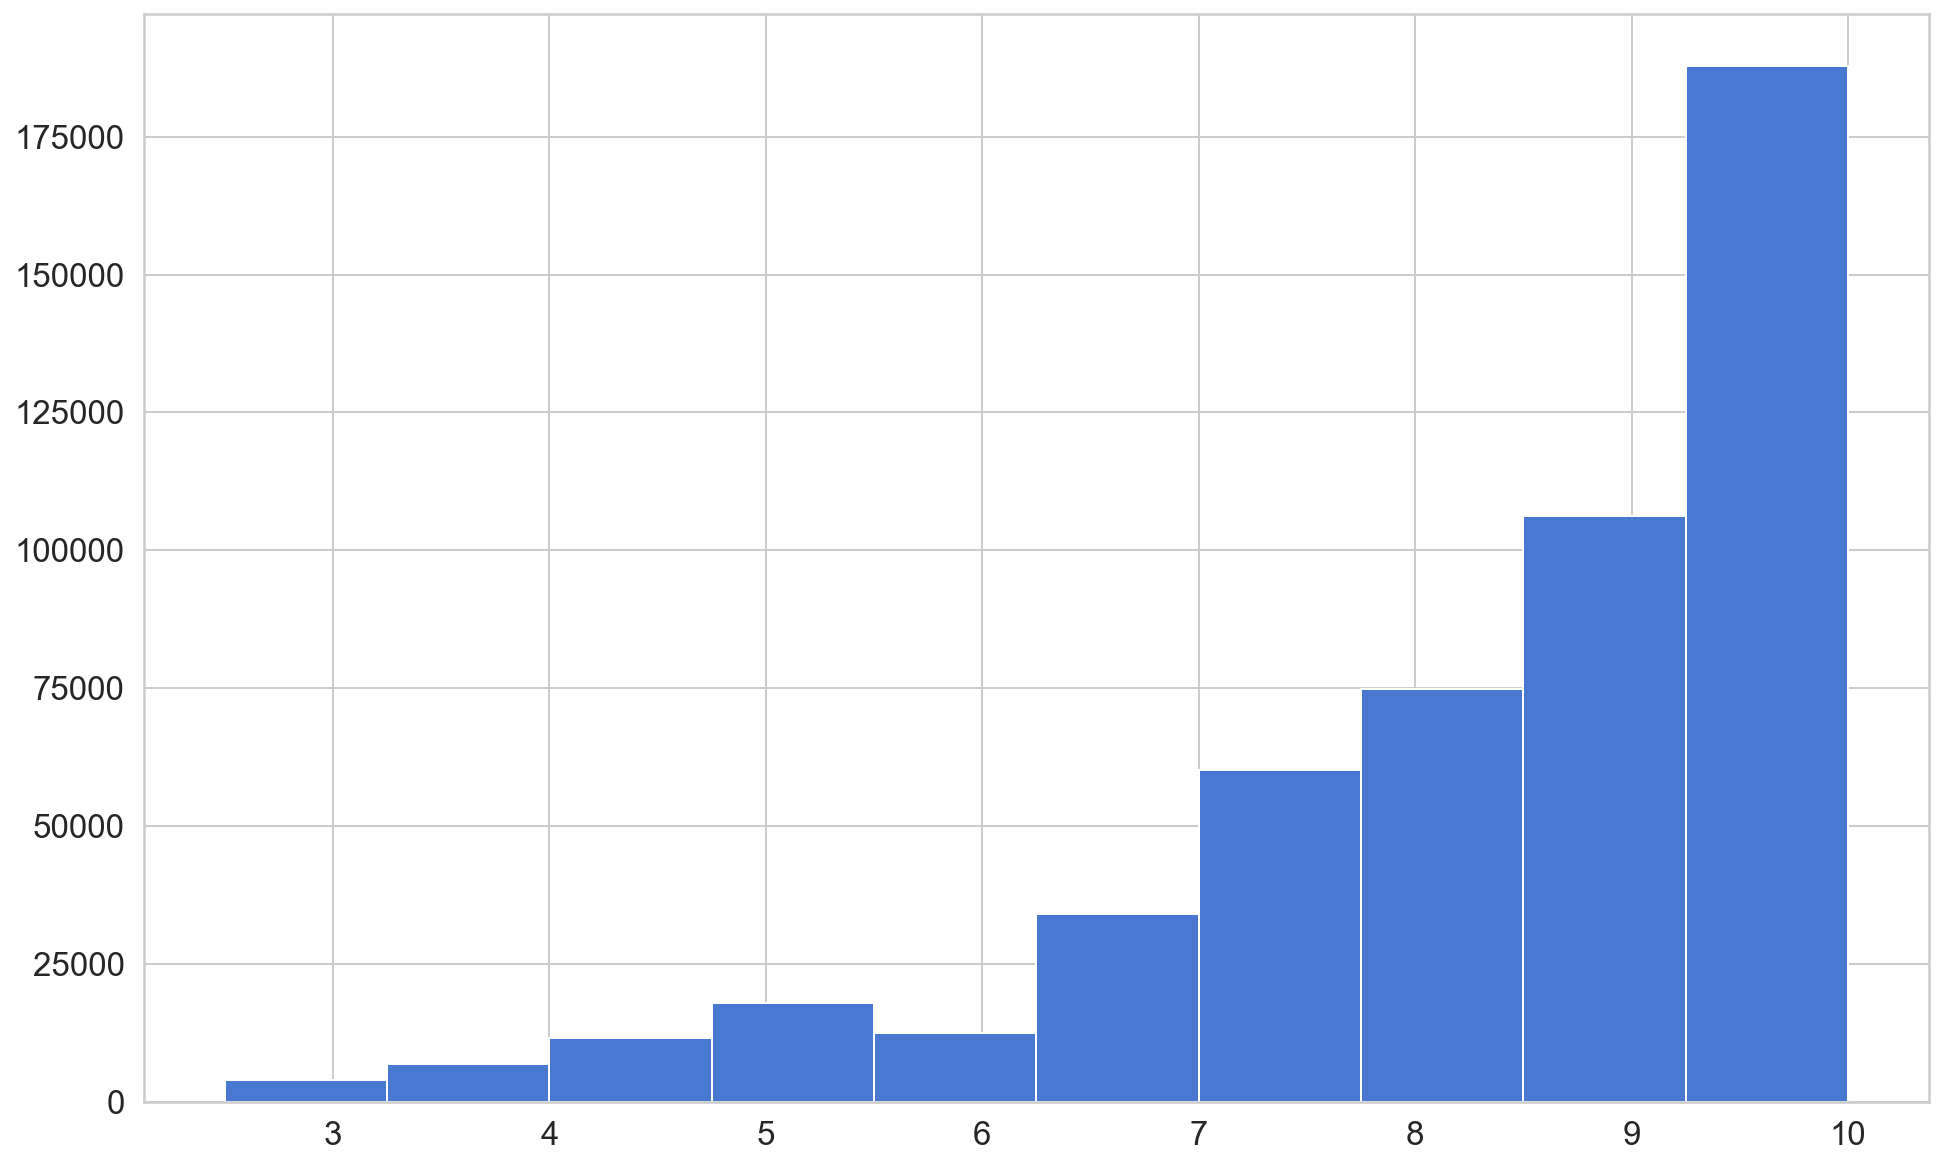

In [5]:
plt.hist(raw['Reviewer_Score'])

In [6]:
print(raw[(raw['Reviewer_Score'] < 6)].count())
print(raw[(raw['Reviewer_Score'] >= 6) & (raw['Reviewer_Score'] < 8)].count())
print(raw[(raw['Reviewer_Score'] >= 8)].count())


Hotel_Address                                 52507
Additional_Number_of_Scoring                  52507
Review_Date                                   52507
Average_Score                                 52507
Hotel_Name                                    52507
Reviewer_Nationality                          52507
Negative_Review                               52507
Review_Total_Negative_Word_Counts             52507
Total_Number_of_Reviews                       52507
Positive_Review                               52507
Review_Total_Positive_Word_Counts             52507
Total_Number_of_Reviews_Reviewer_Has_Given    52507
Reviewer_Score                                52507
Tags                                          52507
days_since_review                             52507
lat                                           52176
lng                                           52176
dtype: int64
Hotel_Address                                 127585
Additional_Number_of_Scoring                  1275

In [7]:
asd = raw.iloc[0:5]

In [8]:
asd.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [9]:
asd.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [10]:
asd['merged'] = asd['Negative_Review']+asd['Positive_Review']


<ipython-input-10-d8ad778d0337>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd['merged'] = asd['Negative_Review']+asd['Positive_Review']


In [11]:
asd['merged']

0     I am so angry that i made this post available...
1    No Negative No real complaints the hotel was g...
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: merged, dtype: object

In [12]:
raw1 = raw.copy()

In [13]:
#there are streets called after cities...


In [14]:
### adding cities
link = "https://en.wikipedia.org/wiki/Largest_capital_cities_of_the_European_Union"
link2 = 'https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits'

table2 = pd.read_html(link2)[0]
table = pd.read_html(link)[0]
#cols_to_keep = ['City']
table2 = table2['City']
table = table['City']

table2 = table2.replace(r"\[.*\]","", regex = True)
cities_to_append = pd.Series(['London', 'Barcelona', 'Oslo', 'Helsinki', 'Athens'])

tab = table.append([table2, cities_to_append], ignore_index = True)

def get_city(string):
    string_short = string.split(' ')[-5:]
    for city in tab:
        if city in (string_short):
            return city

raw['City'] = raw['Hotel_Address'].apply(get_city)

In [15]:
raw['City'].value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: City, dtype: int64

In [16]:
raw = raw[(raw['Negative_Review']!='No Negative')&(raw['Positive_Review']!='No Positive')&(raw['Reviewer_Score']>=8)]

In [17]:
len(raw)

210130

In [18]:
raw.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'City'],
      dtype='object')

In [19]:
raw['merged_review_text'] = raw['Negative_Review']+raw['Positive_Review']

In [20]:
raw10 = raw.sample(n=10000)

In [21]:
len(raw10)

10000

In [22]:
raw10.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'City', 'merged_review_text'],
      dtype='object')

In [23]:
df = raw10[['Hotel_Address','City','merged_review_text','Reviewer_Score']]

In [24]:
df.reset_index(inplace=True)

In [25]:
df.head()

,index,Hotel_Address,City,merged_review_text,Reviewer_Score
0,79991,19 21 Penywern Road Kensington and Chelsea Lon...,London,The staff were a bit cold at first but they g...,8.3
1,451573,Singel 303 309 Amsterdam City Center 1012 WJ A...,Amsterdam,Nothing View from room Location,10.0
2,76898,18 Avenue De Suffren Entr e au 22 rue Jean Rey...,Paris,The Eiffel is blocked by another building we ...,10.0
3,353119,K rntner Ring 9 01 Innere Stadt 1010 Vienna Au...,Vienna,Nothing Attention to detail Glad and smiley s...,9.6
4,359287,Kleine Stadtgutgasse 4 02 Leopoldstadt 1020 Vi...,Vienna,Nothing negative to mention Great location 15...,8.8


In [26]:
df.columns

Index(['index', 'Hotel_Address', 'City', 'merged_review_text',
       'Reviewer_Score'],
      dtype='object')

In [27]:
df = df[['Hotel_Address','City', 'merged_review_text', 'Reviewer_Score']]

In [28]:
df.head()

,Hotel_Address,City,merged_review_text,Reviewer_Score
0,19 21 Penywern Road Kensington and Chelsea Lon...,London,The staff were a bit cold at first but they g...,8.3
1,Singel 303 309 Amsterdam City Center 1012 WJ A...,Amsterdam,Nothing View from room Location,10.0
2,18 Avenue De Suffren Entr e au 22 rue Jean Rey...,Paris,The Eiffel is blocked by another building we ...,10.0
3,K rntner Ring 9 01 Innere Stadt 1010 Vienna Au...,Vienna,Nothing Attention to detail Glad and smiley s...,9.6
4,Kleine Stadtgutgasse 4 02 Leopoldstadt 1020 Vi...,Vienna,Nothing negative to mention Great location 15...,8.8


In [29]:
for i in [1,12,34,576,3245,234,1234,4567,123,1246,9786,7654,6543]:
    print(df.iloc[i][['Hotel_Address','City']])

Hotel_Address    Singel 303 309 Amsterdam City Center 1012 WJ A...
City                                                     Amsterdam
Name: 1, dtype: object
Hotel_Address    4 18 Harrington Gardens Kensington and Chelsea...
City                                                        London
Name: 12, dtype: object
Hotel_Address    83 avenue Kl ber 16th arr 75016 Paris France
City                                                    Paris
Name: 34, dtype: object
Hotel_Address    Great Cumberland Place Westminster Borough Lon...
City                                                        London
Name: 576, dtype: object
Hotel_Address    17 Avenue Kl ber 16th arr 75016 Paris France
City                                                    Paris
Name: 3245, dtype: object
Hotel_Address    30 Rathbone Street West End Westminster Boroug...
City                                                        London
Name: 234, dtype: object
Hotel_Address    69 Vincent Square Westminster Borough London S...
Ci

In [30]:
df['City'].value_counts()

London       5039
Barcelona    1296
Amsterdam    1128
Paris        1092
Vienna        769
Milan         676
Name: City, dtype: int64

In [31]:
df1 = df.copy()

In [32]:
df.drop(df[(df['City']=='Sofia') | (df['City']=='Rome')].index, inplace=True)

In [33]:
df['City'].value_counts()

London       5039
Barcelona    1296
Amsterdam    1128
Paris        1092
Vienna        769
Milan         676
Name: City, dtype: int64

In [34]:
df.columns

Index(['Hotel_Address', 'City', 'merged_review_text', 'Reviewer_Score'], dtype='object')

In [35]:
df['merged_review_text'][0]

' The staff were a bit cold at first but they grew warmer after a couple of days The elevator is a little too small so might consider that in terms of luggage  For this money we couldn t have asked for a better stay We got a great discount and ended up paying around 48 GBP per night for a double bed which is a steal for such a central location The room was small but had everything we needed and more including a safe The bathrobes and slippers were a nice touch The location was perfect Earl s Court tube station is around the corner and from there you can reach any part of the central London in minutes '

In [36]:
df['merged_review_text'][42]

' Shower head too close to wall Tub narrow Location was just a few tube stops from the center of the city but in a quiet and quaint area which was exactly what I wanted '

In [37]:
df.to_csv('cp.csv',index=False)

In [38]:
df.iloc[442]

Hotel_Address         Piet Heinkade 11 Zeeburg 1019 BR Amsterdam Net...
City                                                          Amsterdam
merged_review_text     Late room Cleaning hours at 4 00 or 5 00 pm i...
Reviewer_Score                                                      9.2
Name: 442, dtype: object